<h1> Librerias Necesarias </h1>

In [24]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


<h1> Cargando base de datos de entrenamiento y prueba estandarizados </h1>

In [2]:
def confusion_matrix_graf(y_true, y_pred, dataset = 'Train'):
    # Confusion martix of train and test
    # Train confusion matrix
    labels= ['non-attack', 'attack']
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(metrics.confusion_matrix(y_true, y_pred),
                annot=True, cmap=sns.light_palette("blue"), fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(dataset + " Confusion Matrix")


In [3]:
def metrics_train_test(y_train_true,y_train_pred,y_test_true, y_test_pred):
        # auc curve
        train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train_true, y_train_pred)
        test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test_true, y_test_pred)

        # Scores of train dataset
        train_auc = metrics.auc(train_fpr, train_tpr)
        train_acc = metrics.accuracy_score(y_train_true, y_train_pred)
        train_precision = metrics.precision_score(y_train_true, y_train_pred)
        train_precision_avg = metrics.precision_score(y_train_true, y_train_pred, average='macro')
        train_recall = metrics.recall_score(y_train_true, y_train_pred)
        train_recall_avg = metrics.recall_score(y_train_true, y_train_pred, average='macro')
        train_f1 = metrics.f1_score(y_train_true, y_train_pred)
        train_f1_avg = metrics.f1_score(y_train_true, y_train_pred, average='macro')

        # Scores of test dataset
        test_auc = metrics.auc(test_fpr, test_tpr)
        test_acc = metrics.accuracy_score(y_test_true, y_test_pred)
        test_precision = metrics.precision_score(y_test_true, y_test_pred)
        test_precision_avg = metrics.precision_score(y_test_true, y_test_pred, average='macro')
        test_recall = metrics.recall_score(y_test_true, y_test_pred)
        test_recall_avg = metrics.recall_score(y_test_true, y_test_pred, average='macro')
        test_f1 = metrics.f1_score(y_test_true, y_test_pred)
        test_f1_avg = metrics.f1_score(y_test_true, y_test_pred, average='macro')

        col = ['DataSet','Model','AUC','ACC','Precision','Precision_avg', 'recall', 'recall_avg', 'f1','f1_avg']
        data = [['Train', 'AD', train_auc, train_acc,train_precision,train_precision_avg,train_recall,train_recall_avg,train_f1,train_f1_avg],
                ['Test', 'AD', test_auc, test_acc,test_precision,test_precision_avg,test_recall,test_recall_avg,test_f1,test_f1_avg]]
        df_metrics = pd.DataFrame(data, columns = col)

        # Plot AUC curve
        plt.figure()
        plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
        plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.grid()
        plt.title("Train Curve ROC")
        plt.legend()
        plt.show()

        return df_metrics

In [25]:
# Train and Test data
x_train, y_train = pickle.load(open('final_train_all_stand.pkl', 'rb'))
x_test, y_test = pickle.load(open('final_test_all_stand.pkl', 'rb'))

In [26]:
pickle_model = pickle.load(open('model_clf_DT.pkl','rb'))


In [28]:
x_train = x_train.iloc[:, 0:11]
x_test = x_test.iloc[:, 0:11]

In [37]:
prob = pickle_model.predict_proba(x_test)

In [38]:
prob = prob[:,1]
prob

array([1., 1., 1., ..., 0., 1., 0.])

In [41]:
np.unique(prob)

array([0.        , 0.0625    , 0.95238095, 1.        ])

In [9]:
# Entrenamiento del modelo
model = DecisionTreeClassifier(max_depth = 5, min_samples_split=2, random_state=0)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

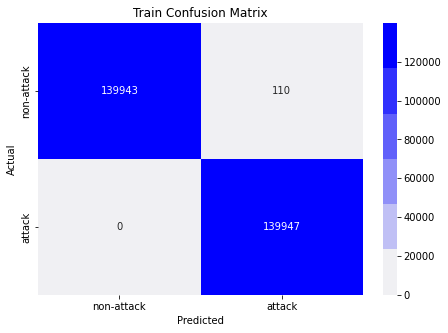

In [10]:
confusion_matrix_graf(y_train,y_train_pred,'Train')

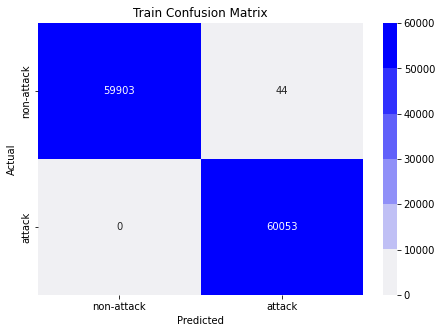

In [11]:
confusion_matrix_graf(y_test,y_test_pred,'Train')

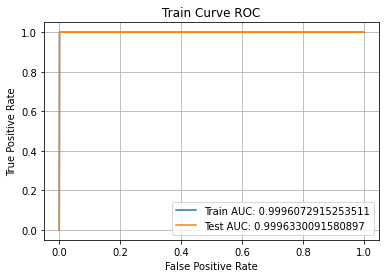

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg
0,Train,AD,0.999607,0.999607,0.999215,0.999607,1.0,0.999607,0.999607,0.999607
1,Test,AD,0.999633,0.999633,0.999268,0.999634,1.0,0.999633,0.999634,0.999633


In [12]:
metrics_AD = metrics_train_test(y_train,y_train_pred,y_test, y_test_pred)
metrics_AD

In [13]:
clf = DecisionTreeClassifier(random_state=0)
param = {'max_depth':[5, 8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

# initialization
scoring = {'auc':'roc_auc',
        'acc' : 'accuracy',
        'precision' : 'precision',
        'recall' : 'recall',
        'f1':'f1'}

tuning_clf = GridSearchCV(clf, param, scoring=scoring, refit='acc', cv=3, verbose=3, return_train_score=True)
hyperparam_tuning = tuning_clf.fit(x_train,y_train)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV 1/3] END max_depth=5, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=0.999, test=0.999) recall: (train=1.000, test=1.000) total time=   0.9s
[CV 2/3] END max_depth=5, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=0.999, test=0.999) recall: (train=1.000, test=1.000) total time=   0.8s
[CV 3/3] END max_depth=5, min_samples_split=2; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=0.999, test=0.999) recall: (train=1.000, test=1.000) total time=   0.9s
[CV 1/3] END max_depth=5, min_samples_split=4; acc: (train=1.000, test=1.000) auc: (train=1.000, test=1.000) f1: (train=1.000, test=1.000) precision: (train=0.999, test=0.999) recall: (train=1.000, test=1.000) total time=   0.8s
[CV 2/3] END max_depth=

In [23]:
print(hyperparam_tuning.best_estimator_)

DecisionTreeClassifier(max_depth=12, random_state=0)


In [15]:
print(hyperparam_tuning.best_params_)

{'max_depth': 12, 'min_samples_split': 2}


In [16]:
print(hyperparam_tuning.best_score_)

0.9999500000127538


In [17]:
df = pd.DataFrame(hyperparam_tuning.cv_results_)
df.sort_values("split1_test_acc")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_auc,split1_test_auc,split2_test_auc,...,split1_test_f1,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,mean_train_f1,std_train_f1
0,0.624381,0.070882,0.345078,0.017332,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.999985,0.999970,0.999971,...,0.999582,0.999582,0.999611,0.000040,13,0.999571,0.999700,0.999609,0.999627,0.000054
1,0.602258,0.011671,0.338972,0.019510,5,4,"{'max_depth': 5, 'min_samples_split': 4}",0.999985,0.999970,0.999971,...,0.999582,0.999582,0.999611,0.000040,13,0.999571,0.999700,0.999609,0.999627,0.000054
2,0.620641,0.009219,0.340091,0.041299,5,6,"{'max_depth': 5, 'min_samples_split': 6}",0.999985,0.999970,0.999971,...,0.999582,0.999582,0.999611,0.000040,13,0.999571,0.999700,0.999604,0.999625,0.000055
3,0.801477,0.252740,0.329620,0.018694,8,2,"{'max_depth': 8, 'min_samples_split': 2}",0.999989,0.999988,0.999977,...,0.999904,0.999775,0.999868,0.000066,10,0.999920,0.999925,0.999802,0.999882,0.000057
4,0.718081,0.081030,0.302653,0.009551,8,4,"{'max_depth': 8, 'min_samples_split': 4}",0.999989,0.999988,0.999977,...,0.999904,0.999775,0.999868,0.000066,10,0.999920,0.999925,0.999802,0.999882,0.000057
5,0.612947,0.023626,0.341134,0.030564,8,6,"{'max_depth': 8, 'min_samples_split': 6}",0.999989,0.999988,0.999977,...,0.999904,0.999775,0.999868,0.000066,10,0.999920,0.999925,0.999796,0.999880,0.000059
6,0.641619,0.020279,0.289893,0.019819,10,2,"{'max_depth': 10, 'min_samples_split': 2}",0.999989,0.999978,0.999968,...,0.999936,0.999925,0.999936,0.000009,7,0.999984,0.999962,0.999968,0.999971,0.000009
7,0.594742,0.016953,0.299532,0.013437,10,4,"{'max_depth': 10, 'min_samples_split': 4}",0.999989,0.999978,0.999968,...,0.999936,0.999925,0.999936,0.000009,7,0.999984,0.999962,0.999968,0.999971,0.000009
8,0.595408,0.036244,0.322206,0.015746,10,6,"{'max_depth': 10, 'min_samples_split': 6}",0.999989,0.999978,0.999968,...,0.999936,0.999925,0.999936,0.000009,7,0.999984,0.999962,0.999962,0.999970,0.000010
12,0.597409,0.020557,0.333442,0.024664,14,2,"{'max_depth': 14, 'min_samples_split': 2}",0.999957,0.999957,0.999946,...,0.999946,0.999946,0.999950,0.000005,2,1.000000,0.999984,0.999995,0.999993,0.000007


In [18]:
# Entrenamiento del modelo
model = DecisionTreeClassifier(max_depth = 12, min_samples_split=2, random_state=0)
model.fit(x_train,y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

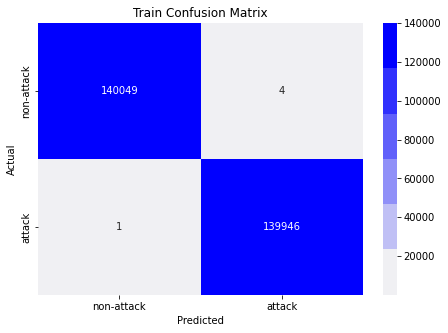

In [19]:
confusion_matrix_graf(y_train, y_train_pred, 'Train')

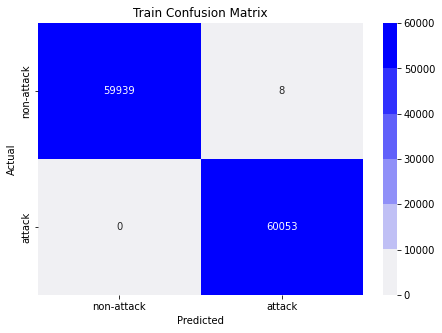

In [20]:
confusion_matrix_graf(y_test, y_test_pred, 'Train')

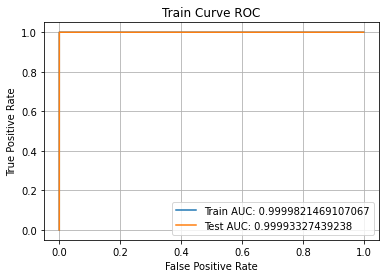

,DataSet,Model,AUC,ACC,Precision,Precision_avg,recall,recall_avg,f1,f1_avg
0,Train,AD,0.999982,0.999982,0.999971,0.999982,0.999993,0.999982,0.999982,0.999982
1,Test,AD,0.999933,0.999933,0.999867,0.999933,1.000000,0.999933,0.999933,0.999933


In [21]:
df_metrics = metrics_train_test(y_train, y_train_pred, y_test, y_test_pred)
df_metrics